# Insurance Claims- Fraud Detection
## Problem Statement:
### Business case:
 Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

 

In [280]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv")

In [3]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


# Exploratory Data Analysis (EDA):

In [4]:
df.shape

(1000, 40)

In [5]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [6]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [7]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [8]:
#dropping columns having more than 50% NAN values
df = df.drop(['_c39'],axis=1)

In [9]:
df.shape

(1000, 39)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [11]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [12]:
df.select_dtypes(include='object').describe().transpose()

,count,unique,top,freq
policy_bind_date,1000,951,01-01-2006,3
policy_state,1000,3,OH,352
policy_csl,1000,3,250/500,351
insured_sex,1000,2,FEMALE,537
insured_education_level,1000,7,JD,161
insured_occupation,1000,14,machine-op-inspct,93
insured_hobbies,1000,20,reading,64
insured_relationship,1000,6,own-child,183
incident_date,1000,60,02-02-2015,28
incident_type,1000,4,Multi-vehicle Collision,419


In [13]:
df.shape

(1000, 39)

# Data Processing:

In [14]:
#replacing ('?') with NAN
df = df[df != '?']

In [15]:
df.shape

(1000, 39)

In [16]:
df.isnull().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [17]:
#replacing NAN values with mode of thier resp.
df['collision_type'].fillna(df['collision_type'].mode()[0],inplace = True)

In [18]:
df['property_damage'].fillna(df['property_damage'].mode()[0],inplace = True)
df['police_report_available'].fillna(df['police_report_available'].mode()[0],inplace = True)

In [19]:
#again checking for null values
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

### NO null values present in Dataset now

# Statistical Summary:

In [20]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


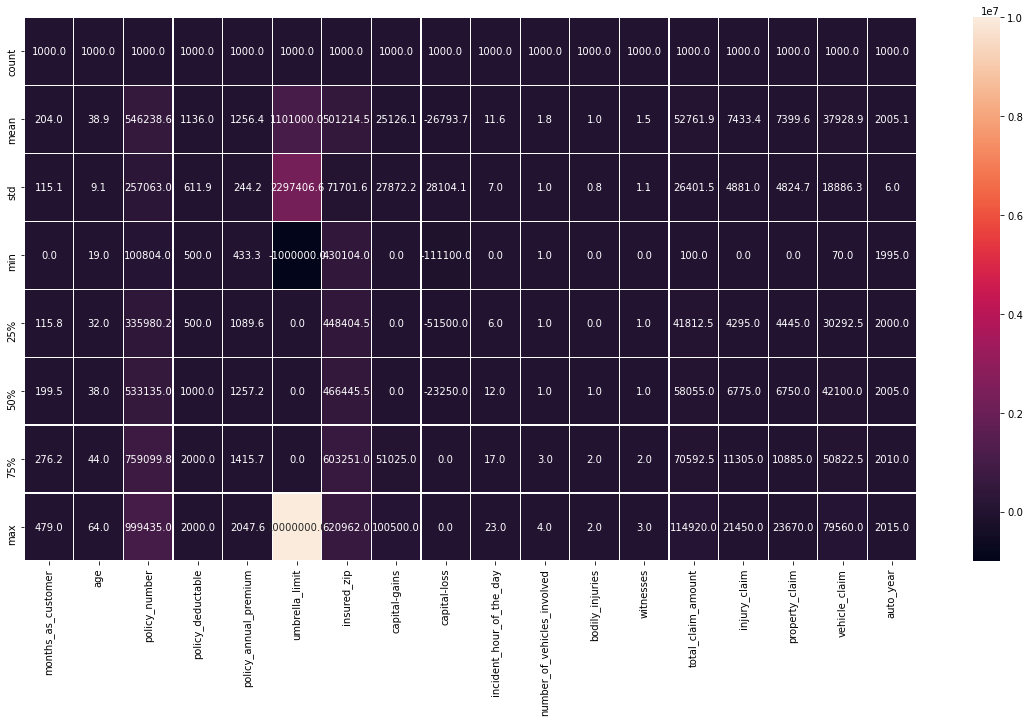

In [21]:
plt.figure(figsize=(20,10))
sns.heatmap(df.describe(),linewidths=0.1,fmt='0.1f',annot=True)
plt.show()

# Data Visualisation:

In [22]:
df['fraud_reported'].unique()

array(['Y', 'N'], dtype=object)

In [23]:
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

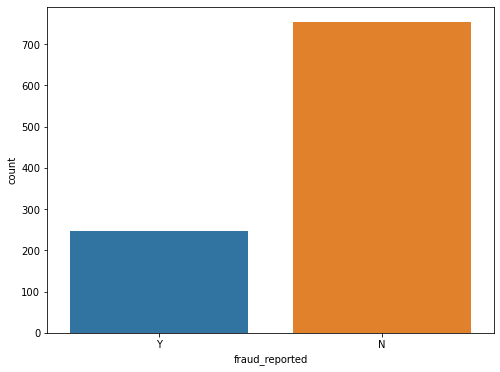

In [24]:
plt.figure(figsize=(8,6))
sns.countplot(df['fraud_reported'])
plt.show()

In [25]:
df['age'].value_counts()

43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
35    32
44    32
36    32
42    32
28    30
45    26
26    26
48    25
47    24
27    24
57    16
55    14
25    14
49    14
50    13
53    13
24    10
54    10
61    10
51     9
60     9
56     8
58     8
23     7
21     6
59     5
52     4
62     4
63     2
64     2
20     1
22     1
19     1
Name: age, dtype: int64

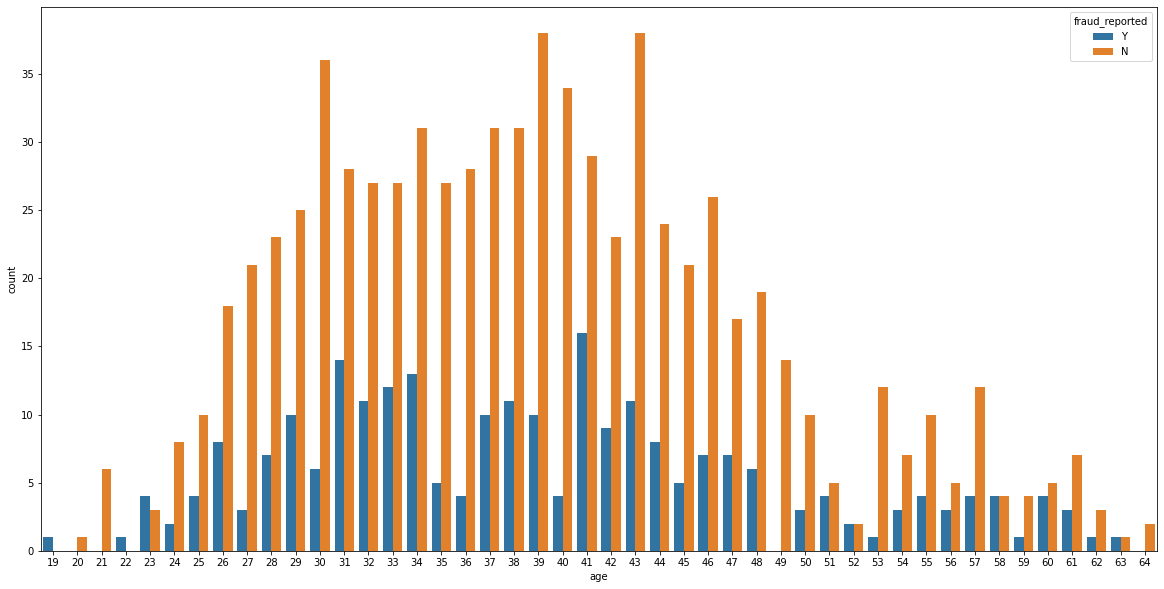

In [26]:
plt.figure(figsize=(20,10))
sns.countplot(x='age',hue='fraud_reported' ,data=df)
plt.show()

In [27]:
df['insured_sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

In [28]:
df['insured_sex'].value_counts()

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64

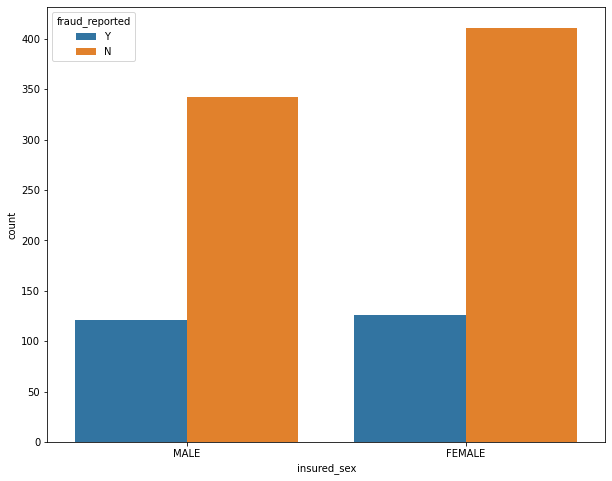

In [29]:
plt.figure(figsize=(10,8))
sns.countplot(x='insured_sex',hue='fraud_reported' ,data=df)
plt.show()

In [30]:
df['policy_state'].unique()

array(['OH', 'IN', 'IL'], dtype=object)

In [31]:
df['policy_state'].value_counts()

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64

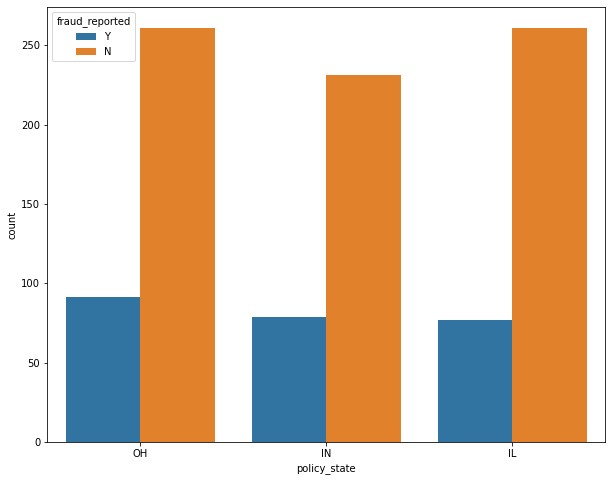

In [32]:
plt.figure(figsize=(10,8))
sns.countplot(x='policy_state',hue='fraud_reported' ,data=df)
plt.show()

In [33]:
df['incident_hour_of_the_day'].unique()

array([ 5,  8,  7, 20, 19,  0, 23, 21, 14, 22,  9, 12, 15,  6, 16,  4, 10,
        1, 17,  3, 11, 13, 18,  2], dtype=int64)

In [34]:
df['incident_hour_of_the_day'].value_counts()

17    54
3     53
0     52
23    51
16    49
4     46
10    46
13    46
6     44
14    43
9     43
21    42
18    41
7     40
19    40
12    40
15    39
22    38
8     36
20    34
5     33
2     31
11    30
1     29
Name: incident_hour_of_the_day, dtype: int64

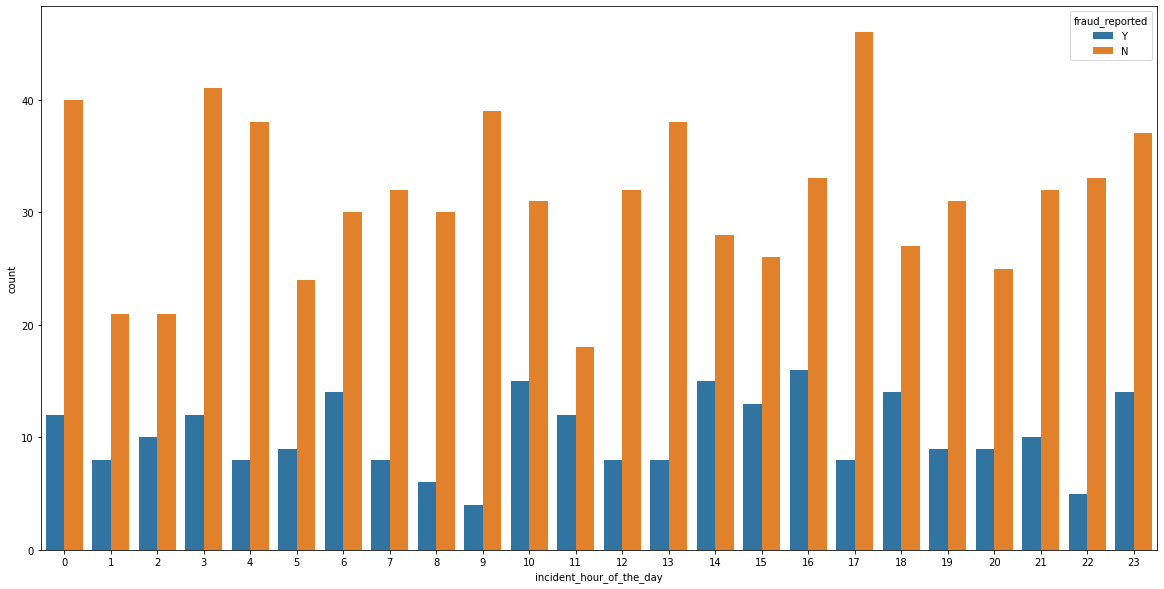

In [35]:
plt.figure(figsize=(20,10))
sns.countplot(x='incident_hour_of_the_day',hue='fraud_reported' ,data=df)
plt.show()

In [36]:
df['incident_type'].unique()

array(['Single Vehicle Collision', 'Vehicle Theft',
       'Multi-vehicle Collision', 'Parked Car'], dtype=object)

In [37]:
df['incident_type'].value_counts()

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64

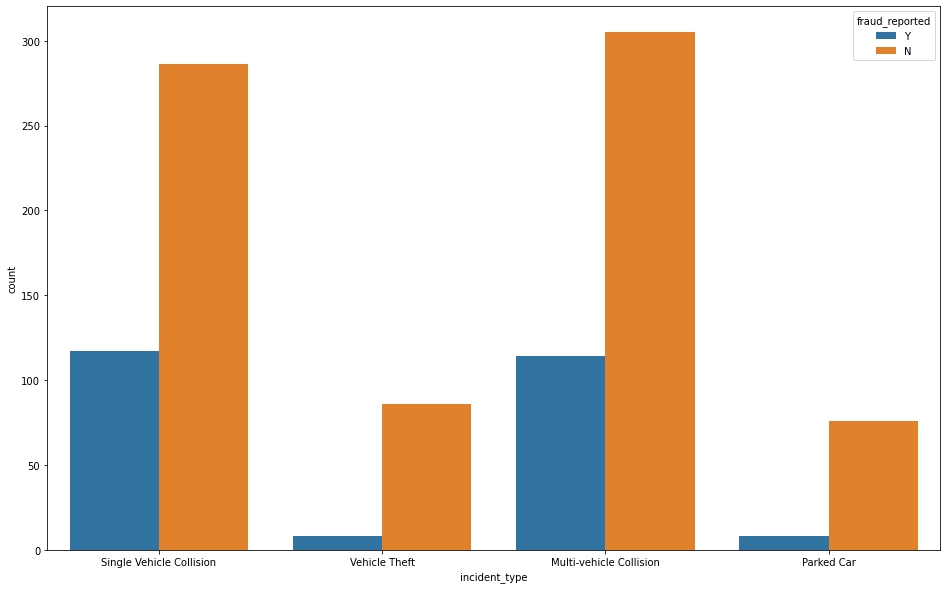

In [38]:
plt.figure(figsize=(16,10))
sns.countplot(x='incident_type',hue='fraud_reported' ,data=df)
plt.show()

In [39]:
df['insured_education_level'].unique()

array(['MD', 'PhD', 'Associate', 'Masters', 'High School', 'College',
       'JD'], dtype=object)

In [40]:
df['insured_education_level'].value_counts()

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64

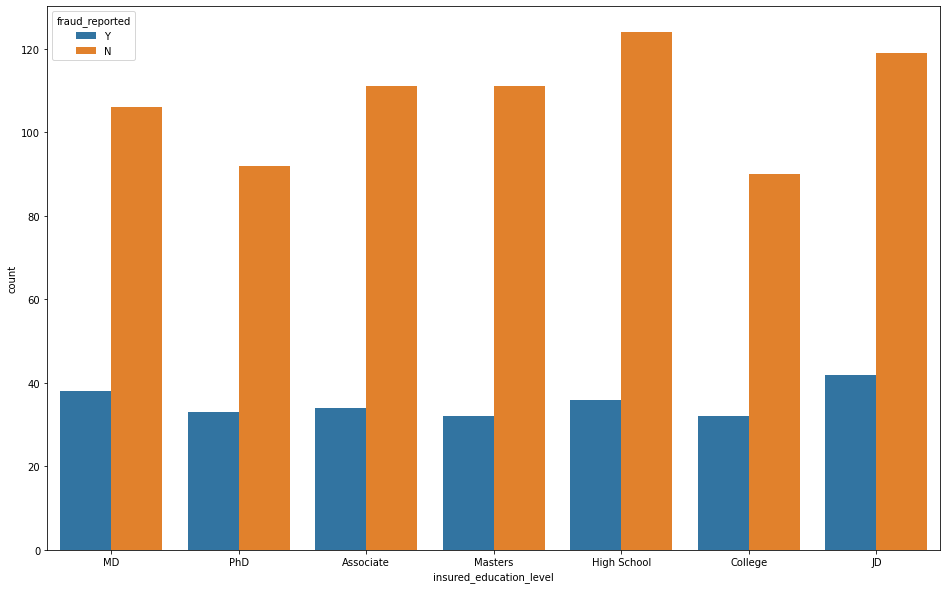

In [41]:
plt.figure(figsize=(16,10))
sns.countplot(x='insured_education_level',hue='fraud_reported' ,data=df)
plt.show()

In [42]:
df['insured_occupation'].unique()

array(['craft-repair', 'machine-op-inspct', 'sales', 'armed-forces',
       'tech-support', 'prof-specialty', 'other-service',
       'priv-house-serv', 'exec-managerial', 'protective-serv',
       'transport-moving', 'handlers-cleaners', 'adm-clerical',
       'farming-fishing'], dtype=object)

In [43]:
df['insured_occupation'].value_counts()

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
priv-house-serv      71
other-service        71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

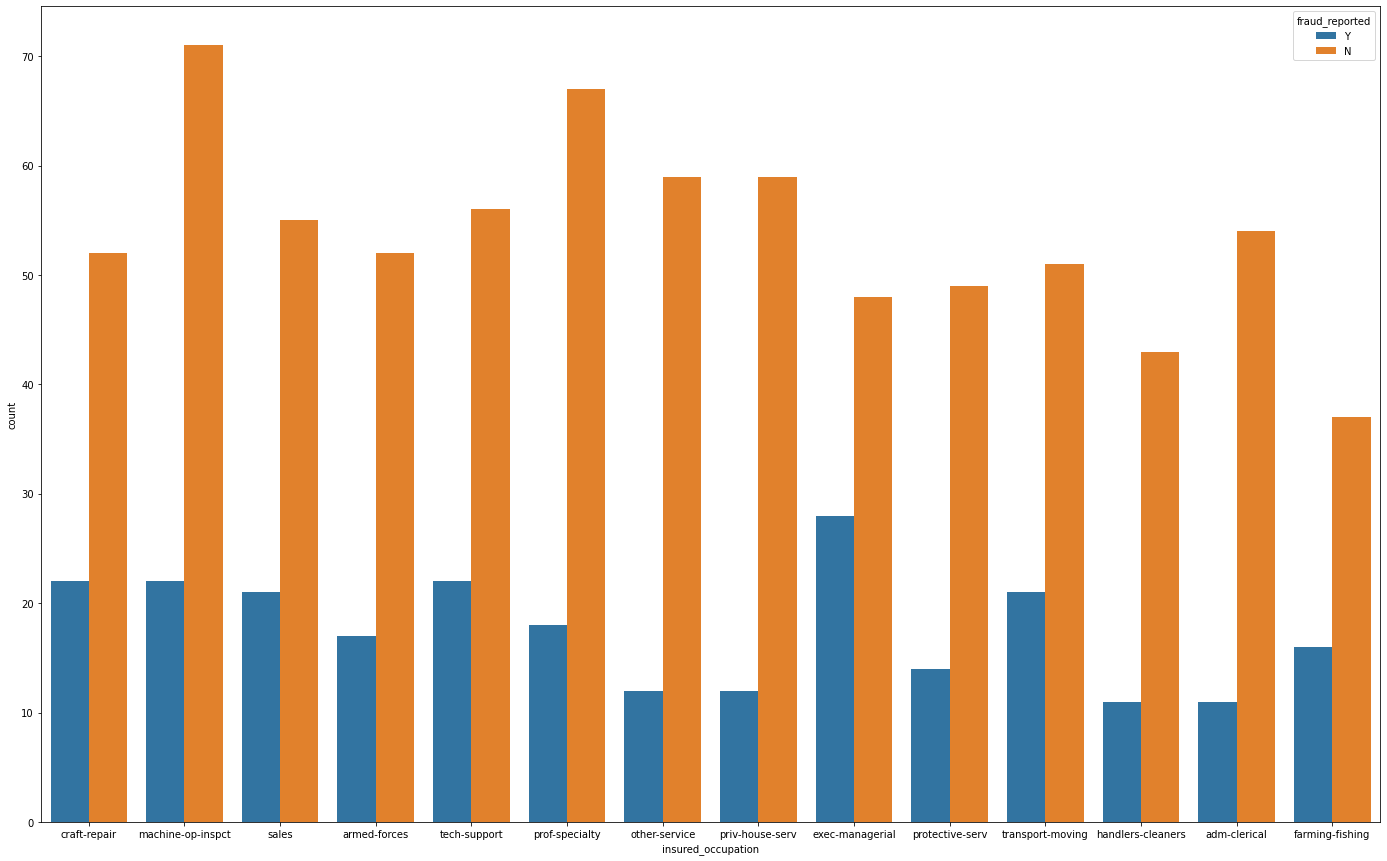

In [44]:
plt.figure(figsize=(24,15))
sns.countplot(x='insured_occupation',hue='fraud_reported' ,data=df)
plt.show()

In [45]:
df['insured_hobbies'].unique()

array(['sleeping', 'reading', 'board-games', 'bungie-jumping',
       'base-jumping', 'golf', 'camping', 'dancing', 'skydiving',
       'movies', 'hiking', 'yachting', 'paintball', 'chess', 'kayaking',
       'polo', 'basketball', 'video-games', 'cross-fit', 'exercise'],
      dtype=object)

In [46]:
df['insured_hobbies'].value_counts()

reading           64
exercise          57
paintball         57
bungie-jumping    56
movies            55
golf              55
camping           55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64

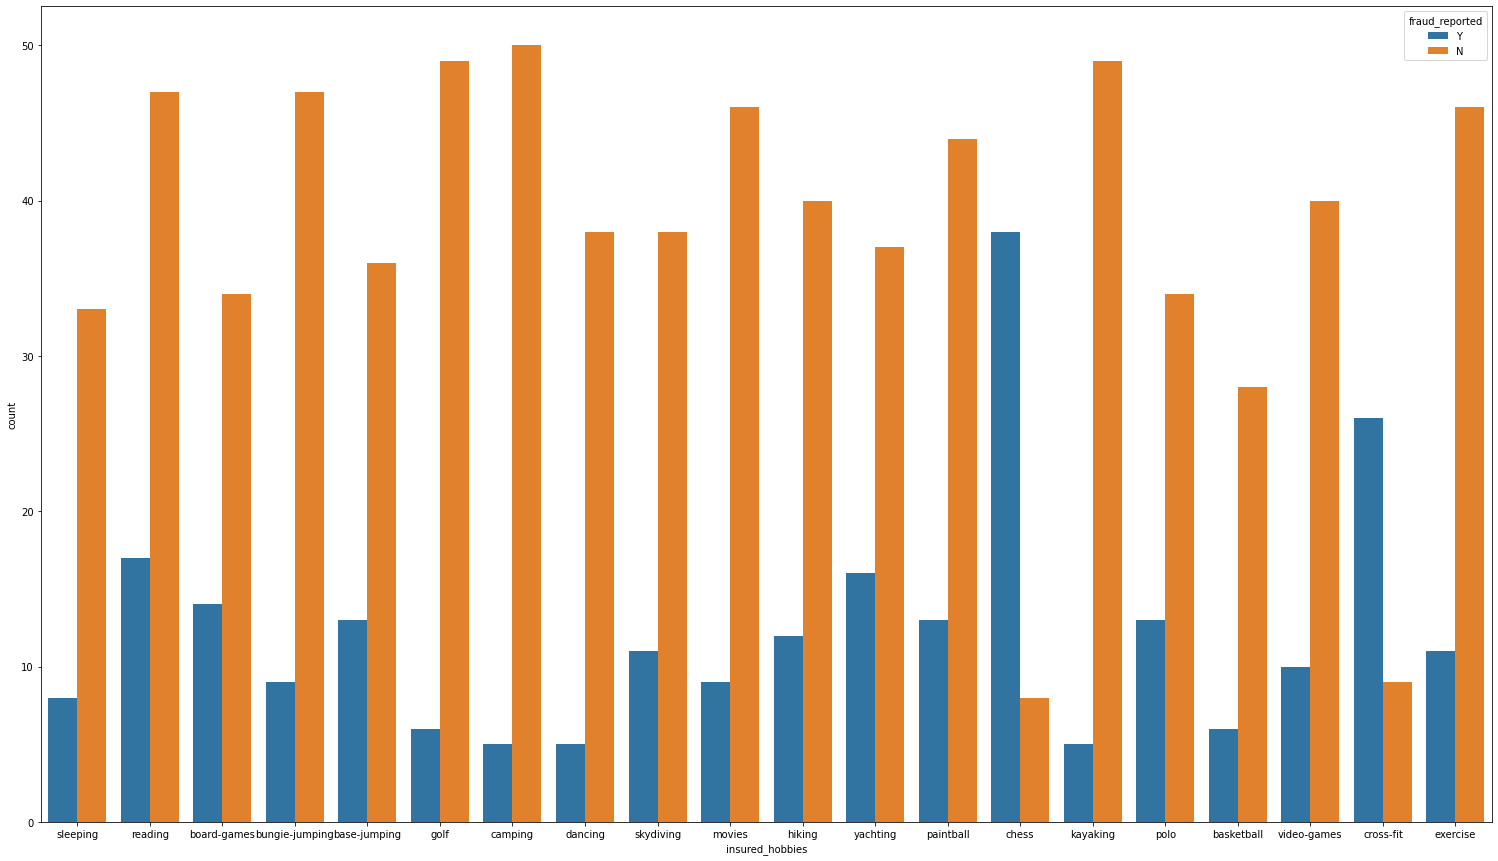

In [47]:
plt.figure(figsize=(26,15))
sns.countplot(x='insured_hobbies',hue='fraud_reported' ,data=df)
plt.show()

In [48]:
df['insured_relationship'].unique()

array(['husband', 'other-relative', 'own-child', 'unmarried', 'wife',
       'not-in-family'], dtype=object)

In [49]:
df['insured_relationship'].value_counts()

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64

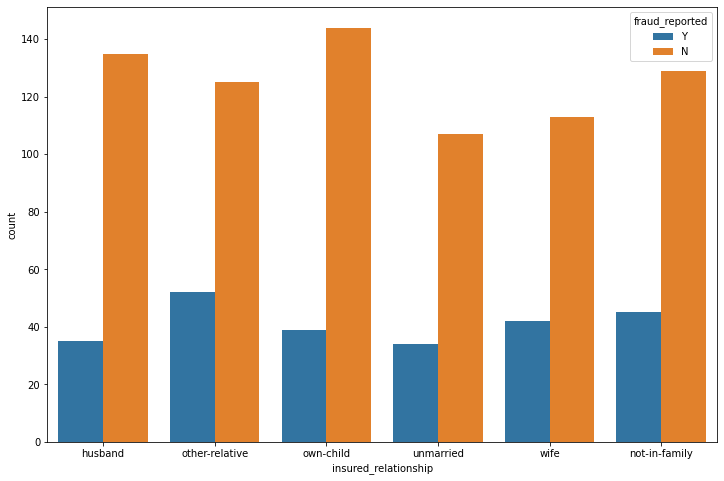

In [50]:
plt.figure(figsize=(12,8))
sns.countplot(x='insured_relationship',hue='fraud_reported' ,data=df)
plt.show()

In [51]:
df['incident_type'].unique()

array(['Single Vehicle Collision', 'Vehicle Theft',
       'Multi-vehicle Collision', 'Parked Car'], dtype=object)

In [52]:
df['incident_type'].value_counts()

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64

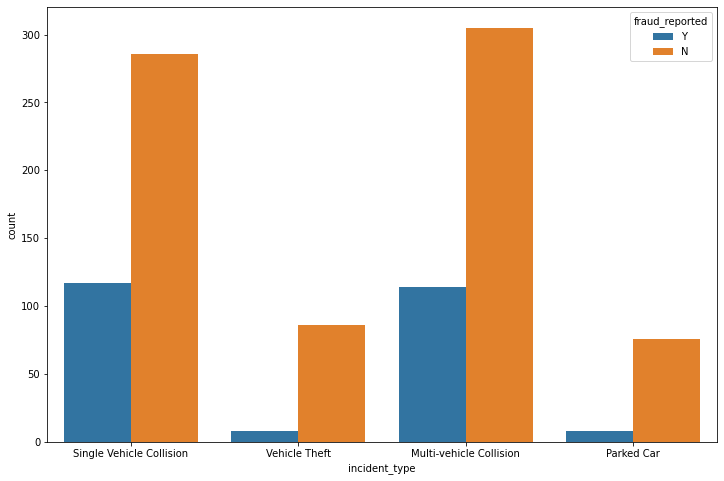

In [53]:
plt.figure(figsize=(12,8))
sns.countplot(x='incident_type',hue='fraud_reported' ,data=df)
plt.show()

In [54]:
df['collision_type'].unique()

array(['Side Collision', 'Rear Collision', 'Front Collision'],
      dtype=object)

In [55]:
df['collision_type'].value_counts()

Rear Collision     470
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64

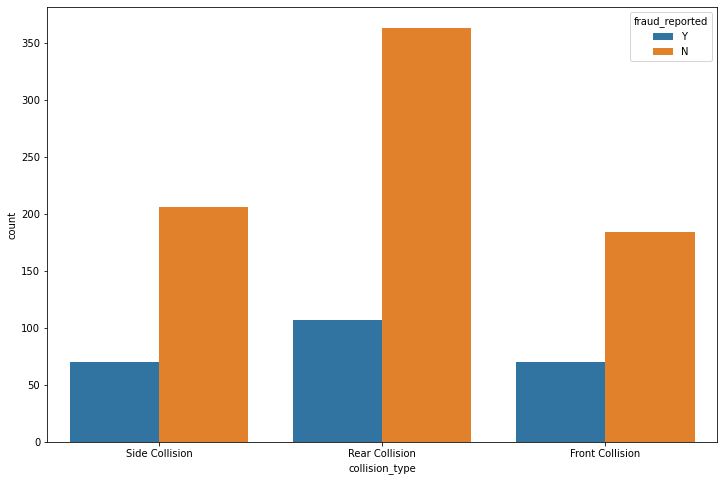

In [56]:
plt.figure(figsize=(12,8))
sns.countplot(x='collision_type',hue='fraud_reported' ,data=df)
plt.show()

In [57]:
df['incident_severity'].unique()

array(['Major Damage', 'Minor Damage', 'Total Loss', 'Trivial Damage'],
      dtype=object)

In [58]:
df['incident_severity'].value_counts()

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64

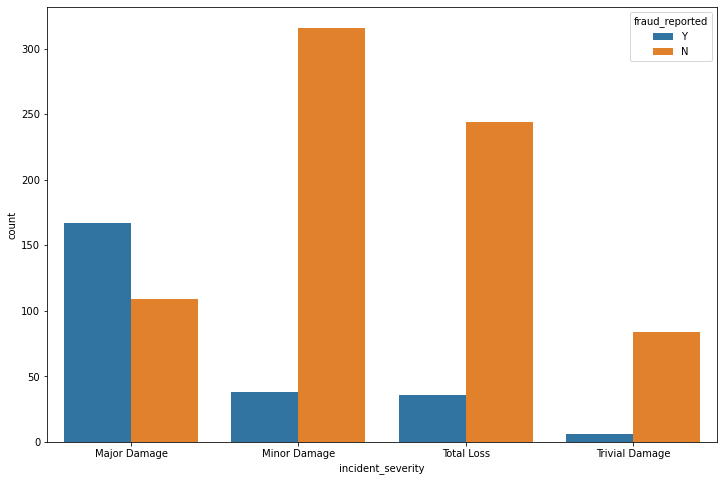

In [59]:
plt.figure(figsize=(12,8))
sns.countplot(x='incident_severity',hue='fraud_reported' ,data=df)
plt.show()

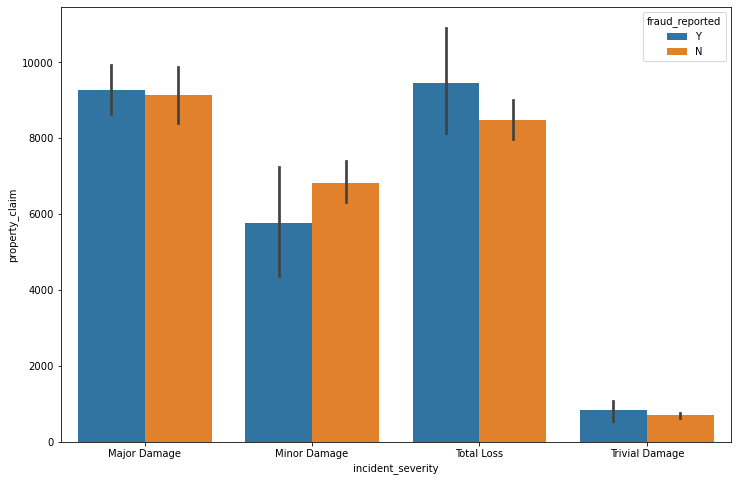

In [60]:
plt.figure(figsize=(12,8))
sns.barplot(x='incident_severity',y='property_claim',hue='fraud_reported' ,data=df)
plt.show()

In [61]:
df['authorities_contacted'].unique()

array(['Police', 'None', 'Fire', 'Other', 'Ambulance'], dtype=object)

In [62]:
df['authorities_contacted'].value_counts()

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64

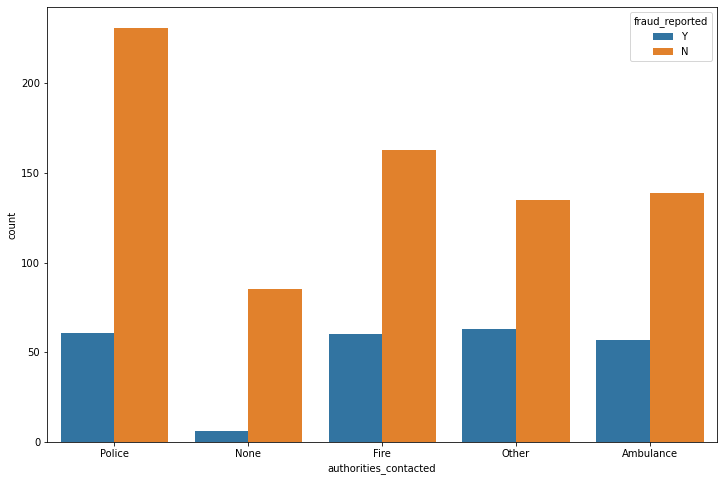

In [63]:
plt.figure(figsize=(12,8))
sns.countplot(x='authorities_contacted',hue='fraud_reported' ,data=df)
plt.show()

In [64]:
df['police_report_available'].unique()

array(['YES', 'NO'], dtype=object)

In [65]:
df['police_report_available'].value_counts()

NO     686
YES    314
Name: police_report_available, dtype: int64

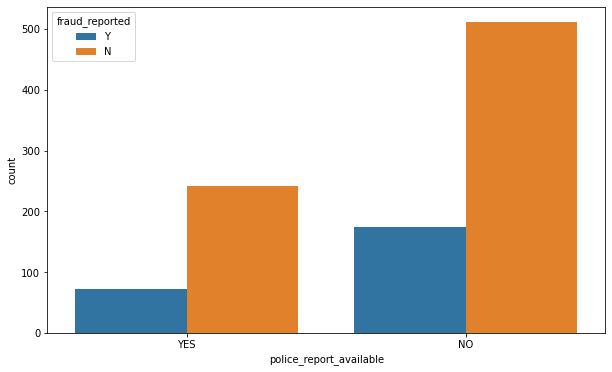

In [66]:
plt.figure(figsize=(10,6))
sns.countplot(x='police_report_available',hue='fraud_reported' ,data=df)
plt.show()

In [67]:
df['incident_state'].unique()

array(['SC', 'VA', 'NY', 'OH', 'WV', 'NC', 'PA'], dtype=object)

In [68]:
df['incident_state'].value_counts()

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64

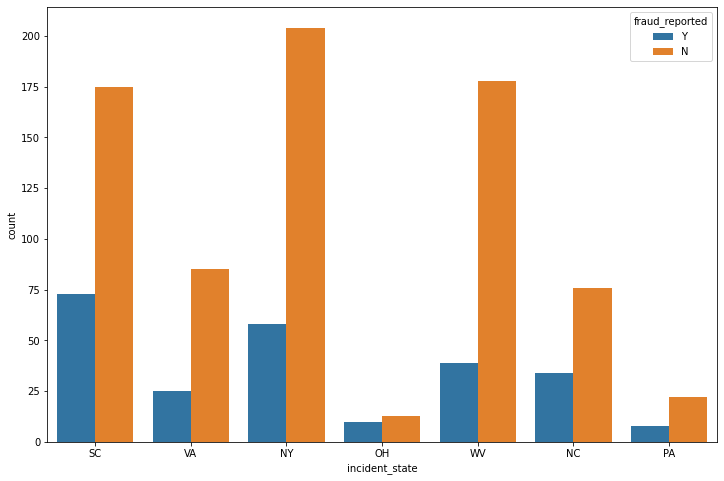

In [69]:
plt.figure(figsize=(12,8))
sns.countplot(x='incident_state',hue='fraud_reported' ,data=df)
plt.show()

In [70]:
df['witnesses'].unique()

array([2, 0, 3, 1], dtype=int64)

In [71]:
df['witnesses'].value_counts()

1    258
2    250
0    249
3    243
Name: witnesses, dtype: int64

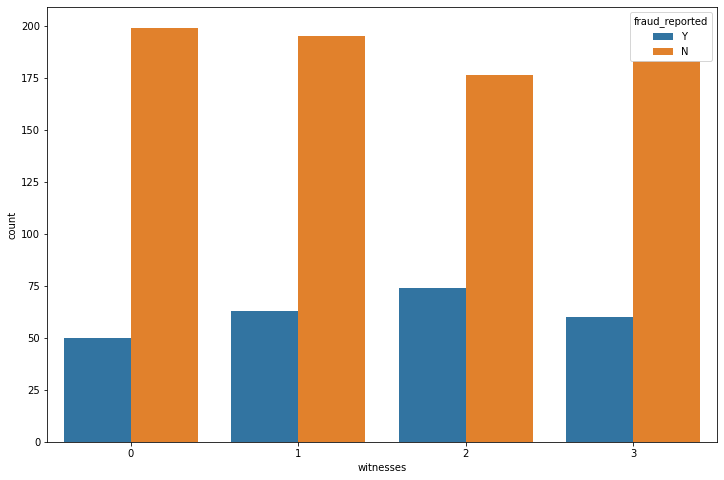

In [72]:
plt.figure(figsize=(12,8))
sns.countplot(x='witnesses',hue='fraud_reported' ,data=df)
plt.show()

#### incident_type vs total claim amount W.R.T fraud_reported

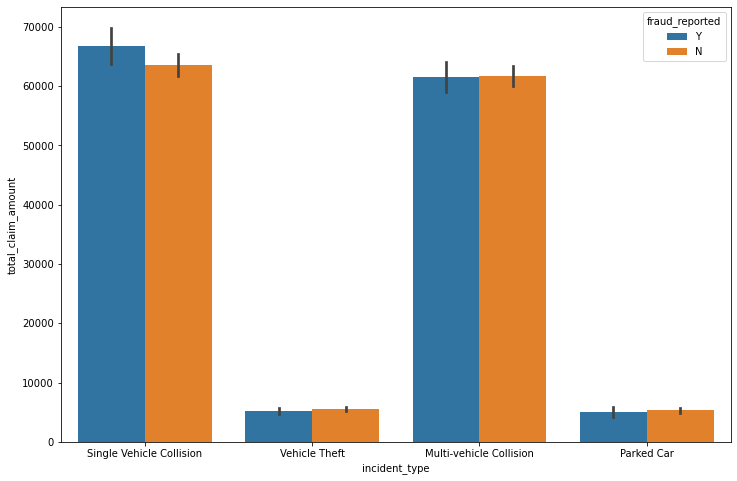

In [73]:
plt.figure(figsize=(12,8))
sns.barplot(x='incident_type',y='total_claim_amount',hue='fraud_reported' ,data=df)
plt.show()

Text(0.5, 1.0, 'Fraud reported VS vechile year')

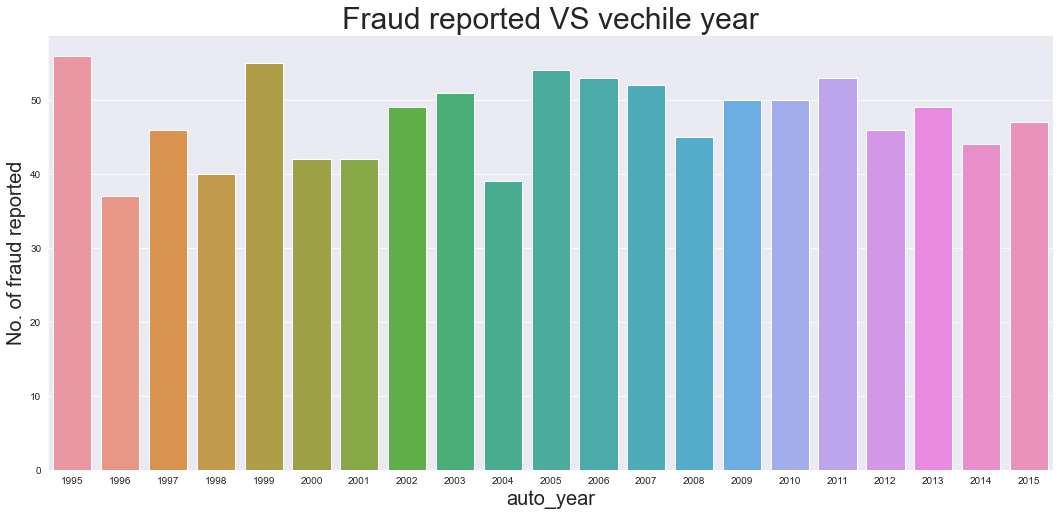

In [74]:
plt.figure(figsize = (18, 8))
df1 = df[df.fraud_reported == 'Y']
sns.set_style('darkgrid')
sns.countplot(x = 'auto_year', data = df)
plt.ylabel('No. of fraud reported',fontsize=20)
plt.xlabel('auto_year',fontsize=20)
plt.title('Fraud reported VS vechile year',fontsize=30)

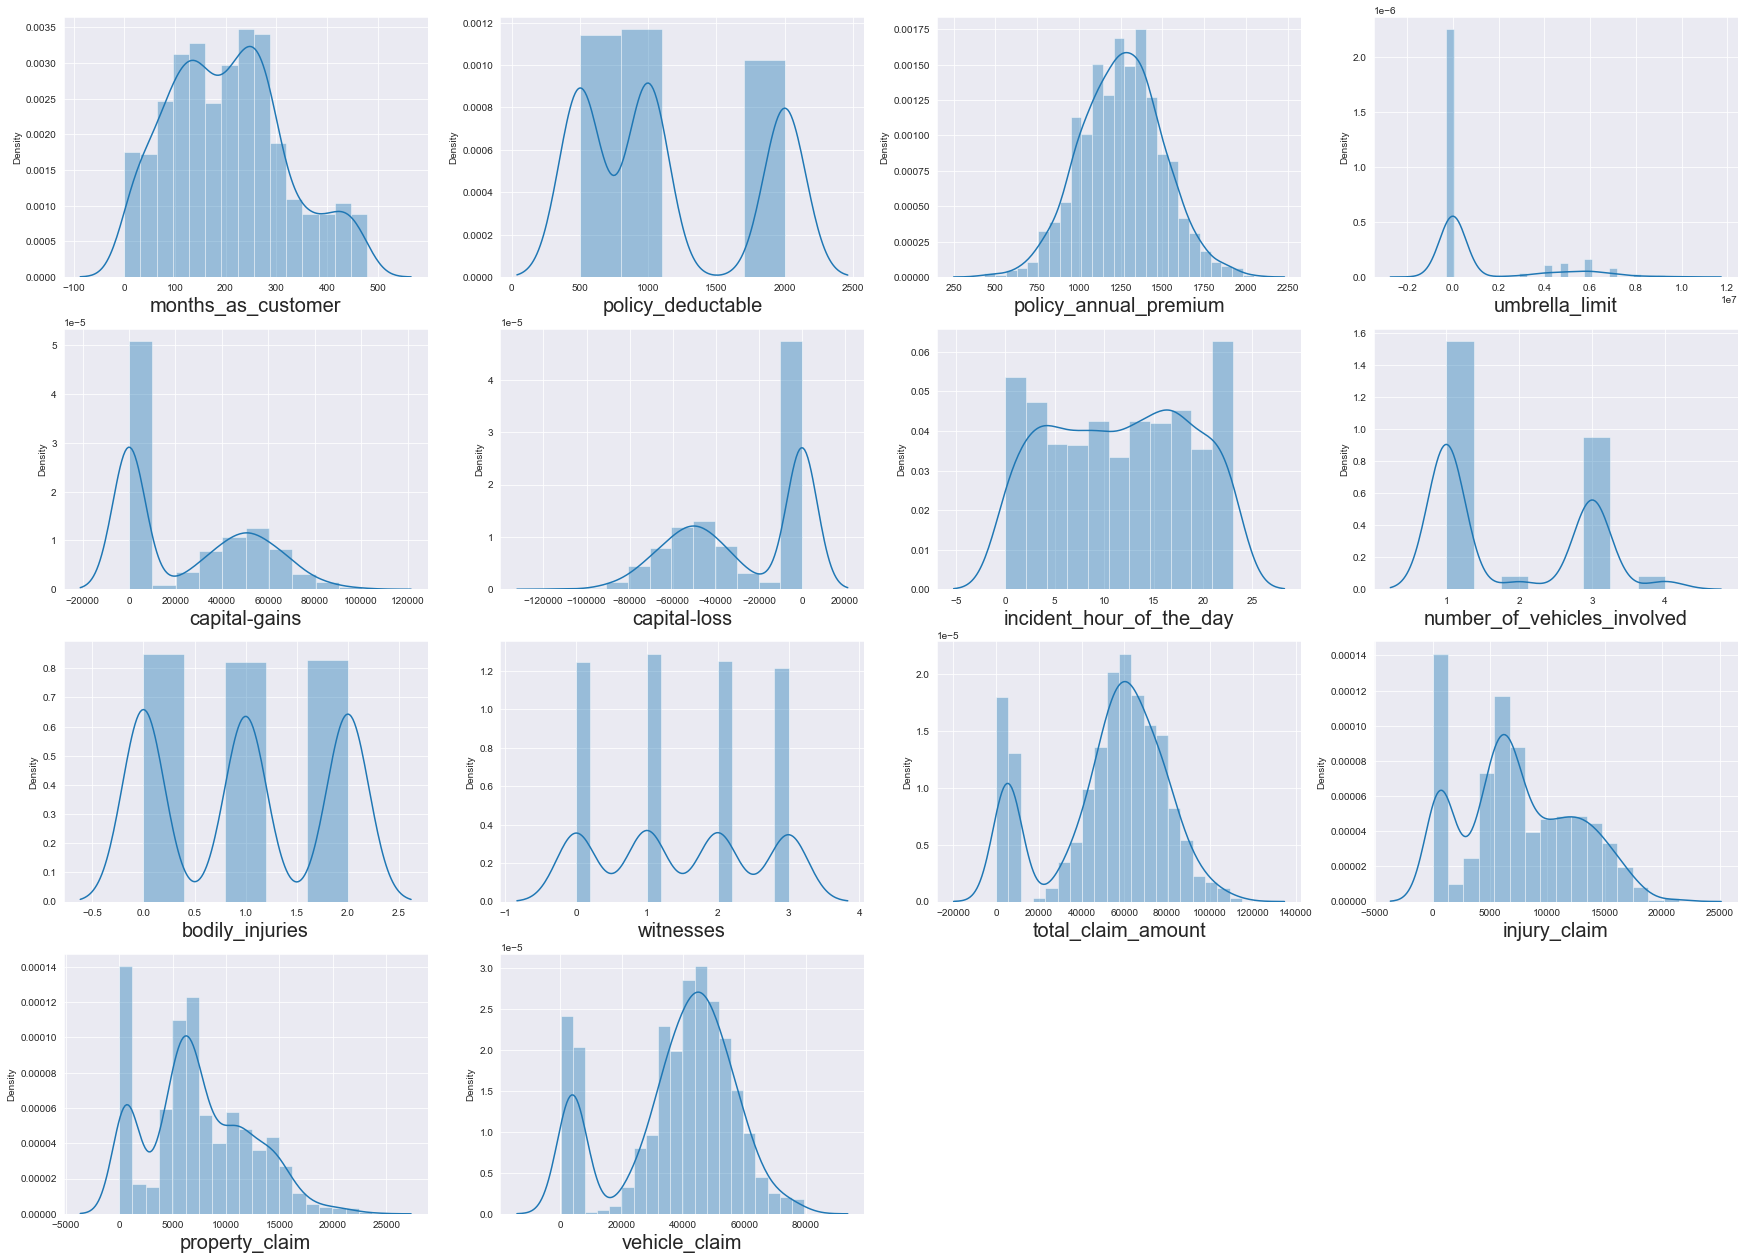

In [75]:
plt.figure(figsize=(30,45),facecolor='white')
plotnum=1
for col in df[['months_as_customer','policy_deductable','policy_annual_premium','umbrella_limit','capital-gains','capital-loss','incident_hour_of_the_day','number_of_vehicles_involved','bodily_injuries','witnesses','total_claim_amount','injury_claim','property_claim','vehicle_claim']]:
    if plotnum<=30:
        plt.subplot(8,4,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

In [76]:
df.shape

(1000, 39)

# Correlation:

In [77]:
df.corr()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
months_as_customer,1.000000,0.922098,0.057555,0.026807,0.005018,0.015498,0.017895,0.006399,0.020209,0.070639,0.014736,-0.010162,0.058383,0.062108,0.065329,0.034940,0.061013,-0.000292
age,0.922098,1.000000,0.059413,0.029188,0.014404,0.018126,0.025604,-0.007075,0.007368,0.087161,0.022102,-0.015679,0.052359,0.069863,0.075522,0.060898,0.062588,0.001354
policy_number,0.057555,0.059413,1.000000,-0.006738,0.022566,0.008968,0.007083,0.009802,-0.005669,0.000113,0.013432,-0.004558,-0.012661,-0.018009,-0.008762,-0.010678,-0.020184,-0.000183
policy_deductable,0.026807,0.029188,-0.006738,1.000000,-0.003245,0.010870,0.004545,0.035212,-0.023544,0.060935,0.051214,-0.022765,0.066639,0.022839,0.039107,0.064792,0.005269,0.026105
policy_annual_premium,0.005018,0.014404,0.022566,-0.003245,1.000000,-0.006247,0.032354,-0.013738,0.023547,-0.001578,-0.045991,0.026780,0.002332,0.009094,-0.017633,-0.011654,0.020246,-0.049226
umbrella_limit,0.015498,0.018126,0.008968,0.010870,-0.006247,1.000000,0.019671,-0.047268,-0.024056,-0.023257,-0.021270,0.022743,-0.006738,-0.040344,-0.045412,-0.023790,-0.038584,0.009893
insured_zip,0.017895,0.025604,0.007083,0.004545,0.032354,0.019671,1.000000,0.006303,0.049372,0.008274,0.027448,0.028695,0.019805,-0.033873,-0.017495,-0.006841,-0.041083,-0.032736
capital-gains,0.006399,-0.007075,0.009802,0.035212,-0.013738,-0.047268,0.006303,1.000000,-0.046904,-0.016406,0.061643,0.055829,-0.017651,0.015980,0.025934,-0.000779,0.015836,0.031398
capital-loss,0.020209,0.007368,-0.005669,-0.023544,0.023547,-0.024056,0.049372,-0.046904,1.000000,-0.025054,-0.014895,-0.024418,-0.041330,-0.036060,-0.046060,-0.022863,-0.032665,-0.056615
incident_hour_of_the_day,0.070639,0.087161,0.000113,0.060935,-0.001578,-0.023257,0.008274,-0.016406,-0.025054,1.000000,0.120794,-0.034563,0.006527,0.217702,0.165768,0.179536,0.215626,0.021368


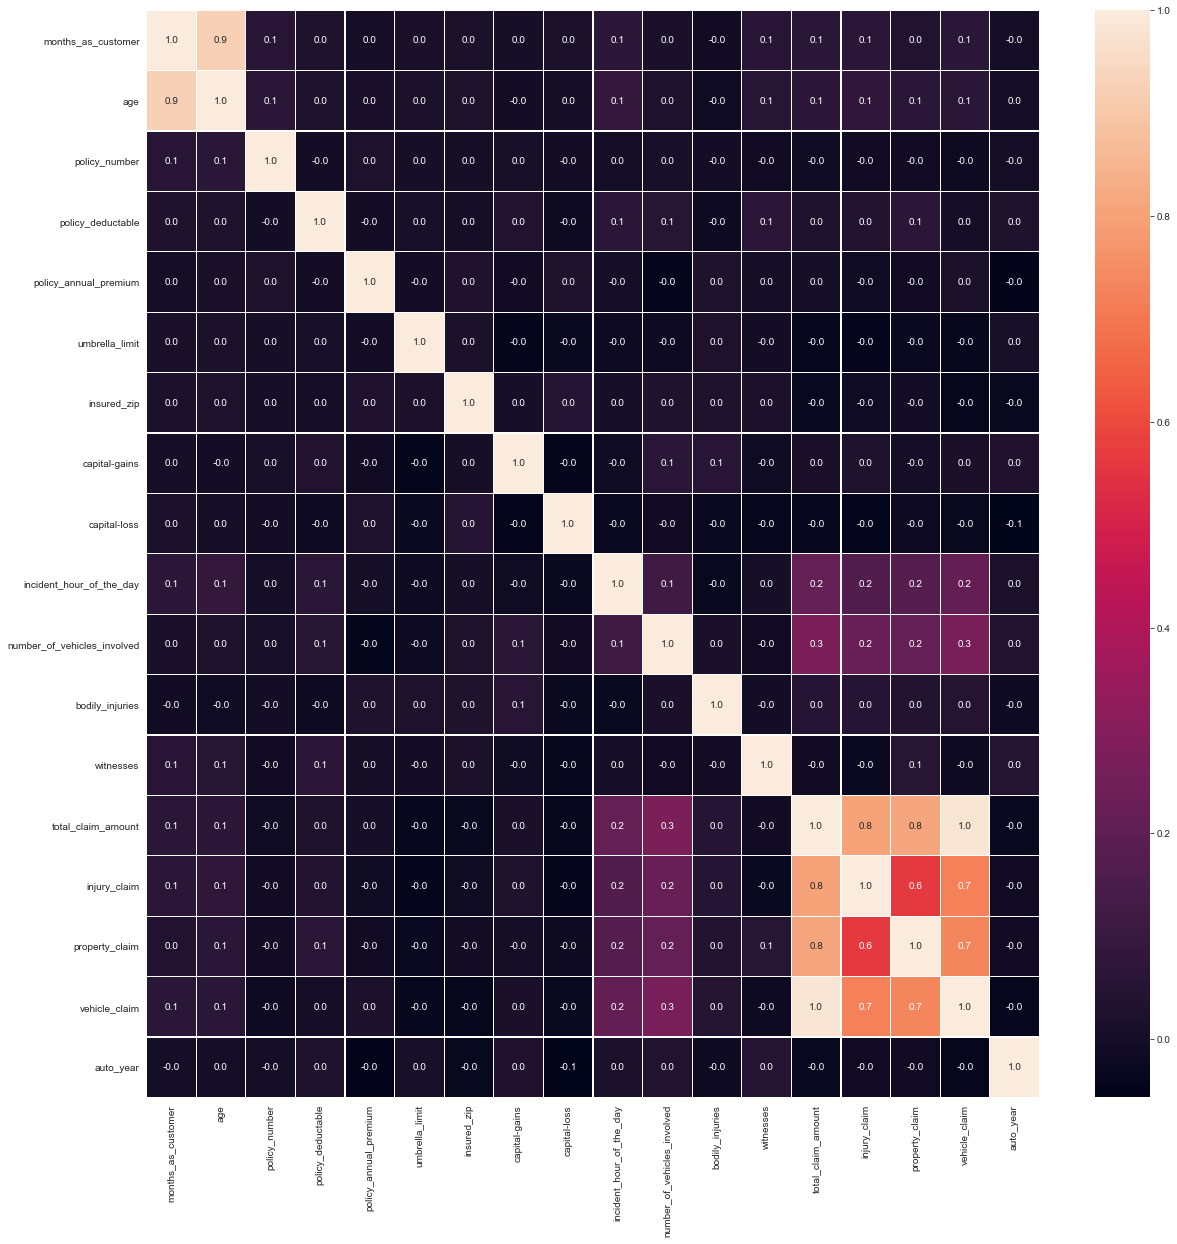

In [78]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),linewidths=0.1,fmt='0.1f',annot=True)
plt.show()

# Label Encoding:

In [140]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [141]:
#list of categorical vsriables
lst = df.select_dtypes(exclude=['int','float']).columns.to_list()

In [142]:
lst

['months_as_customer',
 'age',
 'policy_number',
 'policy_bind_date',
 'policy_state',
 'policy_csl',
 'policy_deductable',
 'umbrella_limit',
 'insured_zip',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'capital-gains',
 'capital-loss',
 'incident_date',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'incident_location',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'property_damage',
 'bodily_injuries',
 'witnesses',
 'police_report_available',
 'injury_claim',
 'property_claim',
 'auto_make',
 'auto_model',
 'auto_year',
 'fraud_reported']

In [143]:
for x in lst:
    df[x]=le.fit_transform(df[x])

In [144]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,297,29,471,522,2,1,1,1406.91,1,478,...,2,1,0.719485,257,508,0.757816,10,1,9,1
1,211,23,253,805,1,1,2,1197.22,5,511,...,0,0,-1.778833,46,45,-1.788203,8,12,12,1
2,122,10,658,185,2,0,2,1413.14,5,6,...,3,0,-0.717305,335,103,-0.821553,4,30,12,0
3,237,22,140,750,0,1,2,1415.74,6,800,...,2,0,0.394103,244,247,0.681441,3,34,19,1
4,211,25,280,180,0,2,1,1583.91,6,835,...,1,0,-1.731679,69,36,-1.741666,0,31,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,19,917,477,2,2,1,1310.80,1,19,...,1,0,1.344860,618,376,1.265257,6,6,11,0
996,264,22,101,128,0,0,1,1436.79,1,801,...,3,0,2.211895,624,603,1.913524,13,28,20,0
997,118,15,884,499,2,1,0,1383.49,3,177,...,3,1,0.556225,322,327,0.781439,11,19,1,0
998,374,43,490,561,0,2,2,1356.92,5,153,...,1,1,-0.246792,167,169,-0.103047,1,5,3,0


# Checking for Outliers:

In [145]:
X = df.drop(columns = ['fraud_reported'])
y = df['fraud_reported']

<AxesSubplot:xlabel='months_as_customer'>

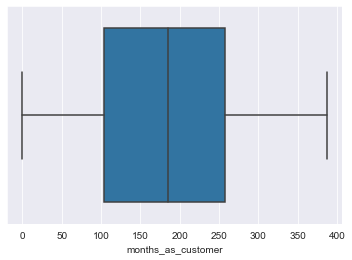

In [146]:
sns.boxplot(df['months_as_customer'])

<AxesSubplot:xlabel='age'>

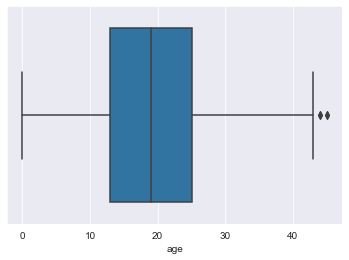

In [147]:
sns.boxplot(df['age'])

<AxesSubplot:xlabel='policy_number'>

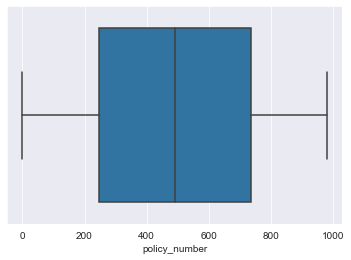

In [148]:
sns.boxplot(df['policy_number'])

<AxesSubplot:xlabel='policy_annual_premium'>

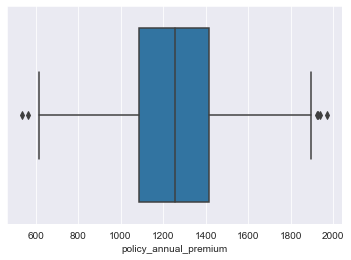

In [149]:
sns.boxplot(df['policy_annual_premium'])

<AxesSubplot:xlabel='umbrella_limit'>

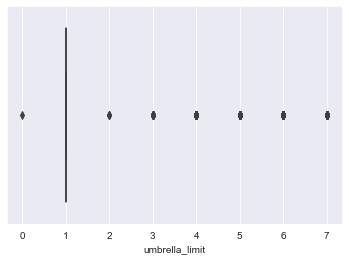

In [150]:
sns.boxplot(df['umbrella_limit'])

<AxesSubplot:xlabel='insured_zip'>

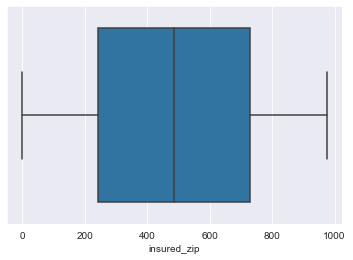

In [151]:
sns.boxplot(df['insured_zip'])

<AxesSubplot:xlabel='capital-gains'>

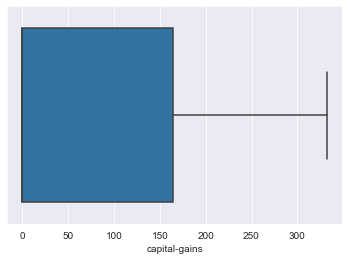

In [152]:
sns.boxplot(df['capital-gains'])

<AxesSubplot:xlabel='capital-loss'>

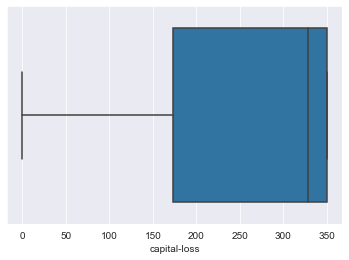

In [153]:
sns.boxplot(df['capital-loss'])

<AxesSubplot:xlabel='incident_hour_of_the_day'>

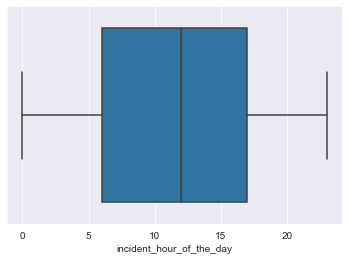

In [154]:
sns.boxplot(df['incident_hour_of_the_day'])

<AxesSubplot:xlabel='number_of_vehicles_involved'>

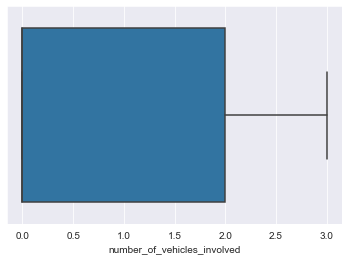

In [155]:
sns.boxplot(df['number_of_vehicles_involved'])

<AxesSubplot:xlabel='bodily_injuries'>

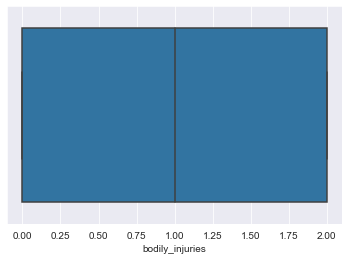

In [156]:
sns.boxplot(df['bodily_injuries'])

<AxesSubplot:xlabel='witnesses'>

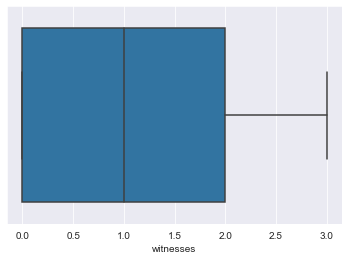

In [157]:
sns.boxplot(df['witnesses'])

<AxesSubplot:xlabel='total_claim_amount'>

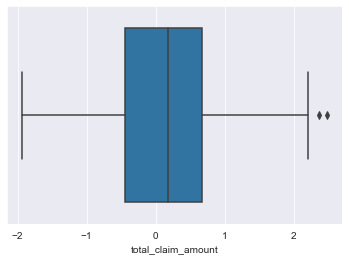

In [158]:
sns.boxplot(df['total_claim_amount'])

<AxesSubplot:xlabel='injury_claim'>

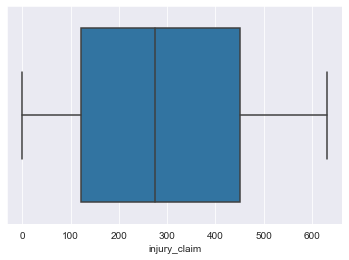

In [159]:
sns.boxplot(df['injury_claim'])

<AxesSubplot:xlabel='property_claim'>

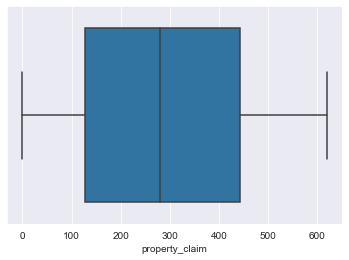

In [160]:
sns.boxplot(df['property_claim'])

<AxesSubplot:xlabel='vehicle_claim'>

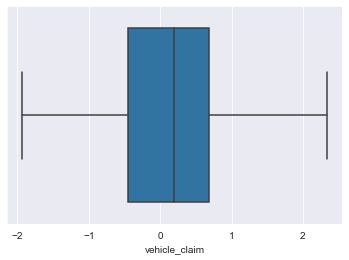

In [161]:
sns.boxplot(df['vehicle_claim'])

<AxesSubplot:xlabel='auto_year'>

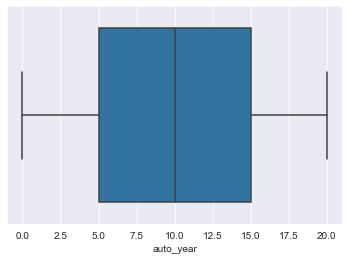

In [162]:
sns.boxplot(df['auto_year'])

In [163]:
df.shape

(981, 39)

# Zscore for removing Outliers:

In [164]:
from scipy.stats import zscore

In [165]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,297,29,471,522,2,1,1,1406.91,1,478,...,2,1,0.719485,257,508,0.757816,10,1,9,1
1,211,23,253,805,1,1,2,1197.22,5,511,...,0,0,-1.778833,46,45,-1.788203,8,12,12,1
2,122,10,658,185,2,0,2,1413.14,5,6,...,3,0,-0.717305,335,103,-0.821553,4,30,12,0
3,237,22,140,750,0,1,2,1415.74,6,800,...,2,0,0.394103,244,247,0.681441,3,34,19,1
4,211,25,280,180,0,2,1,1583.91,6,835,...,1,0,-1.731679,69,36,-1.741666,0,31,14,0


In [166]:
df1=  X[['vehicle_claim','property_claim','total_claim_amount','umbrella_limit','policy_annual_premium']].copy()

In [167]:
Z = zscore(df1)

In [168]:
z_abs_score = np.abs(Z)

In [169]:
#taking 3 as thresold value
df2 = df1[(z_abs_score < 3).all(axis=1)]

In [170]:
df2.shape

(981, 5)

In [171]:
df1.shape

(981, 5)

In [172]:
dropindx = X.index.difference(df2.index)

In [173]:
df.drop(dropindx,inplace = True) #dropping the outlier Dataframe

In [174]:
df.shape

(981, 39)

# Checking For Skewness:

In [175]:
df.skew()

months_as_customer             0.089225
age                            0.475942
policy_number                  0.000000
policy_bind_date               0.007029
policy_state                  -0.038101
policy_csl                     0.098092
policy_deductable              0.057252
policy_annual_premium          0.034884
umbrella_limit                 1.895411
insured_zip                    0.001667
insured_sex                    0.141238
insured_education_level        0.006225
insured_occupation            -0.057292
insured_hobbies               -0.060134
insured_relationship           0.076242
capital-gains                  0.890529
capital-loss                  -0.816038
incident_date                  0.003842
incident_type                  0.092461
collision_type                -0.032704
incident_severity              0.278443
authorities_contacted         -0.112301
incident_state                -0.147048
incident_city                  0.042537
incident_location              0.000000


In [176]:
X.skew()

months_as_customer             0.089225
age                            0.475942
policy_number                  0.000000
policy_bind_date               0.007029
policy_state                  -0.038101
policy_csl                     0.098092
policy_deductable              0.057252
policy_annual_premium          0.034884
umbrella_limit                 1.895411
insured_zip                    0.001667
insured_sex                    0.141238
insured_education_level        0.006225
insured_occupation            -0.057292
insured_hobbies               -0.060134
insured_relationship           0.076242
capital-gains                  0.890529
capital-loss                  -0.816038
incident_date                  0.003842
incident_type                  0.092461
collision_type                -0.032704
incident_severity              0.278443
authorities_contacted         -0.112301
incident_state                -0.147048
incident_city                  0.042537
incident_location              0.000000


# Plotting Skewness:

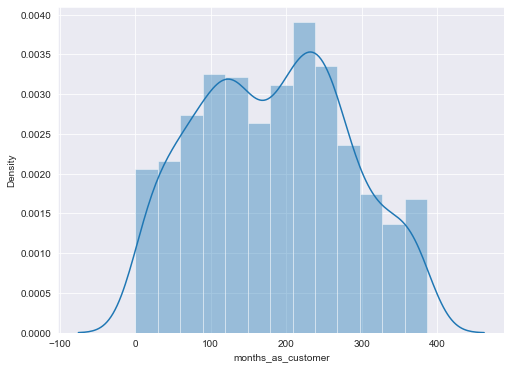

In [177]:
plt.figure(figsize=(8,6))
sns.distplot(df['months_as_customer'])
plt.show()

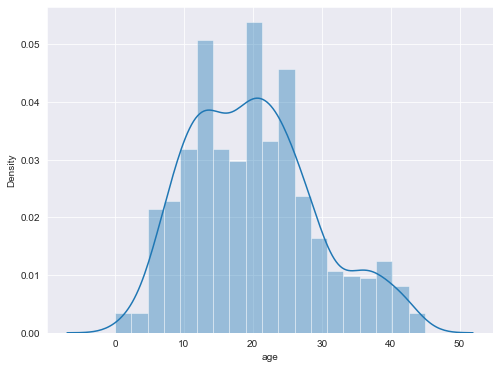

In [178]:
plt.figure(figsize=(8,6))
sns.distplot(df['age'])
plt.show()

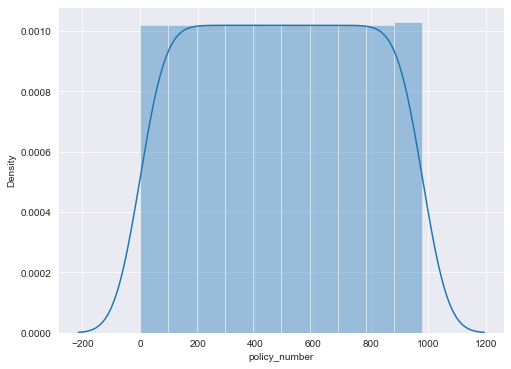

In [179]:
plt.figure(figsize=(8,6))
sns.distplot(df['policy_number'])
plt.show()

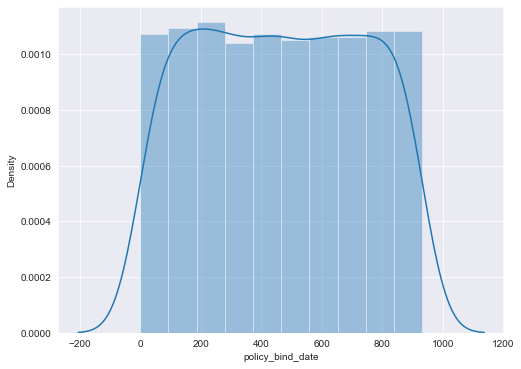

In [180]:
plt.figure(figsize=(8,6))
sns.distplot(df['policy_bind_date'])
plt.show()

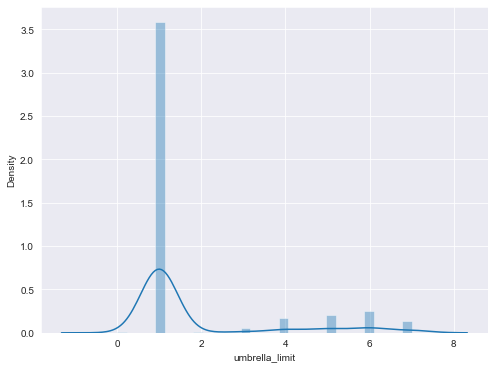

In [181]:
plt.figure(figsize=(8,6))
sns.distplot(df['umbrella_limit'])
plt.show()

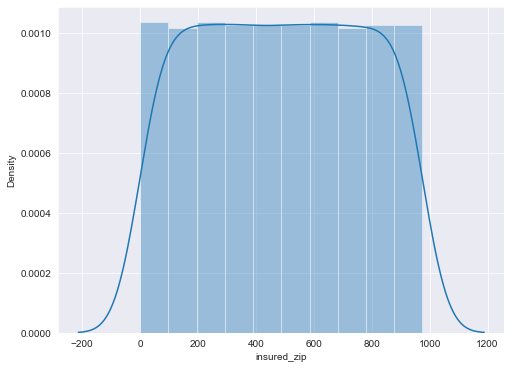

In [182]:
plt.figure(figsize=(8,6))
sns.distplot(df['insured_zip'])
plt.show()

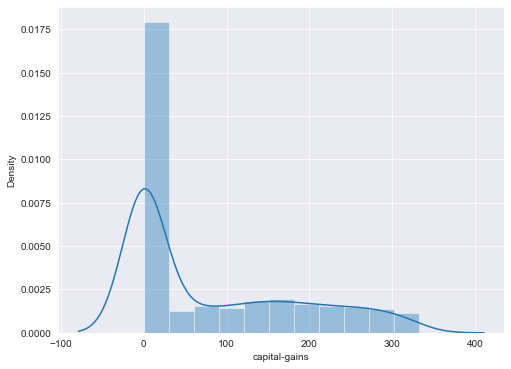

In [183]:
plt.figure(figsize=(8,6))
sns.distplot(df['capital-gains'])
plt.show()

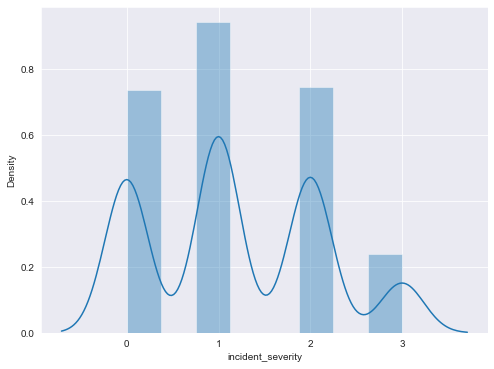

In [184]:
plt.figure(figsize=(8,6))
sns.distplot(df['incident_severity'])
plt.show()

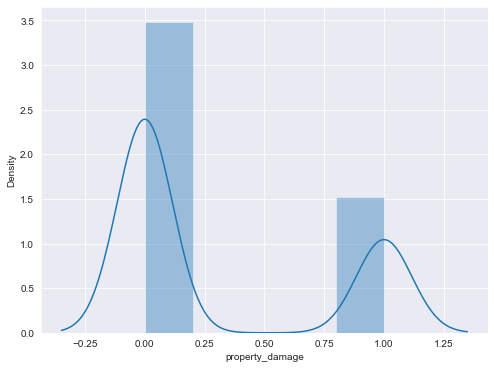

In [185]:
plt.figure(figsize=(8,6))
sns.distplot(df['property_damage'])
plt.show()

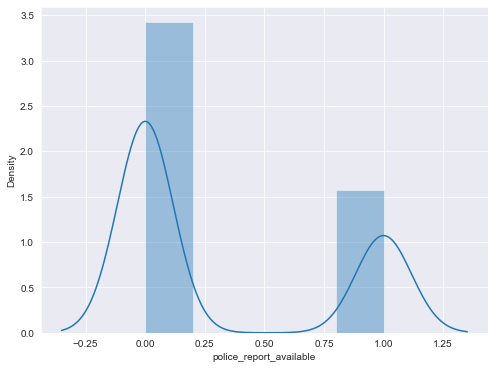

In [186]:
plt.figure(figsize=(8,6))
sns.distplot(df['police_report_available'])
plt.show()

# Reducing skewness using PowerTransformer

In [187]:
from sklearn.preprocessing import PowerTransformer

In [188]:
powtrans= PowerTransformer(method='yeo-johnson', standardize=True)

In [189]:
df3 = df[['vehicle_claim','total_claim_amount']]

In [190]:
transformed= powtrans.fit_transform(df3)

In [191]:
transformed = pd.DataFrame(transformed, columns=df3.columns) #to convert numpy array back into dataframe

In [192]:
transformed.skew()

vehicle_claim         0.049597
total_claim_amount    0.052059
dtype: float64

In [193]:
transformed.index = df.index

In [194]:
df[['vehicle_claim','total_claim_amount']]=transformed[['vehicle_claim','total_claim_amount']]

In [195]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,297,29,471,522,2,1,1,1406.91,1,478,...,2,1,0.691077,257,508,0.740346,10,1,9,1
1,211,23,253,805,1,1,2,1197.22,5,511,...,0,0,-1.590744,46,45,-1.593594,8,12,12,1
2,122,10,658,185,2,0,2,1413.14,5,6,...,3,0,-0.796814,335,103,-0.884955,4,30,12,0
3,237,22,140,750,0,1,2,1415.74,6,800,...,2,0,0.293187,244,247,0.642318,3,34,19,1
4,211,25,280,180,0,2,1,1583.91,6,835,...,1,0,-1.558383,69,36,-1.562066,0,31,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,19,917,477,2,2,1,1310.80,1,19,...,1,0,1.540717,618,376,1.434441,6,6,11,0
996,264,22,101,128,0,0,1,1436.79,1,801,...,3,0,2.874383,624,603,2.417861,13,28,20,0
997,118,15,884,499,2,1,0,1383.49,3,177,...,3,1,0.487304,322,327,0.771024,11,19,1,0
998,374,43,490,561,0,2,2,1356.92,5,153,...,1,1,-0.382816,167,169,-0.249203,1,5,3,0


# Standard Scaler Method:

In [198]:
from sklearn.preprocessing import StandardScaler

In [201]:
scaler = StandardScaler()
std_X = scaler.fit_transform(df)

# Principle Component Analysis:

In [202]:
from sklearn.decomposition import PCA
pca = PCA(n_components=15)

In [203]:
component = pca.fit_transform(std_X)

In [204]:
pca.fit(std_X)

PCA(n_components=15)

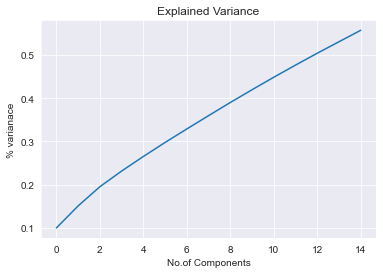

In [205]:
#visualzise
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('No.of Components')
plt.ylabel('% varianace')
plt.title('Explained Variance')
plt.show()

In [207]:
final = PCA(n_components=15)
final_data = final.fit_transform(scaled_X)
pca_X = pd.DataFrame(final_data)
pca_X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.067023,1.094607,1.326730,2.620972,2.918036,-2.014622,0.495513,-0.357491,-0.327967,-0.777432,0.744384,-0.121163,2.188169,-0.721104,0.367630
1,-3.161240,1.002187,0.780843,-0.632056,1.154300,-1.249004,0.143361,0.126979,0.877860,-1.031913,-0.589837,1.208316,1.197643,0.679512,0.560361
2,-0.881544,-0.970781,-1.586106,-1.433215,-1.252708,-0.925804,-0.489205,-0.909787,0.236788,-0.089979,2.220589,-1.279079,0.319957,-1.673035,-1.090200
3,0.335202,1.236884,1.257128,-3.324385,-0.516346,-2.410295,-0.705410,0.781204,-0.088762,0.482495,2.006535,0.871924,0.550929,-0.183989,0.051170
4,-3.006308,1.376209,0.074062,-2.379020,-0.235840,0.489865,0.431534,-1.458441,-0.726478,0.815208,0.551698,1.146304,-1.267438,-0.958748,-1.471044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,2.006533,-1.092287,2.296384,0.886261,0.018305,0.950747,-0.237217,-0.111842,-0.591499,-1.952332,0.697931,0.164082,-1.275366,-0.056708,-1.539237
977,4.322472,0.493553,2.164985,0.885593,-0.139461,0.319044,-0.057959,1.395617,0.083881,2.484011,1.437891,0.832089,0.924718,1.069215,-1.691515
978,0.793219,-1.036297,-1.063516,0.722097,-0.116948,-1.267763,0.325007,-1.427998,0.119030,-0.334650,1.145457,-3.274058,0.532119,-1.494317,0.296606
979,-1.122426,3.751187,0.409390,-0.723425,0.281293,0.598290,-0.628141,-1.949268,-0.028096,-1.320528,0.195052,-0.793891,-0.707677,-1.508998,0.293136


# Model Building:

In [229]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.model_selection import GridSearchCV,cross_val_score

## Spliting data

In [209]:
X_train,X_test,y_train,y_test = train_test_split(pca_X,y,test_size=.31,random_state=9)

### LogisticRegression

In [210]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [211]:
lr.score(X_train,y_train)

0.9822485207100592

In [212]:
pred_lr = lr.predict(X_test)

In [214]:
print(accuracy_score(y_test,pred_lr))
print(confusion_matrix(y_test,pred_lr))
print(classification_report(y_test,pred_lr))

0.9672131147540983
[[228   4]
 [  6  67]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       232
           1       0.94      0.92      0.93        73

    accuracy                           0.97       305
   macro avg       0.96      0.95      0.95       305
weighted avg       0.97      0.97      0.97       305



 ### KNeighborsClassifier:

In [225]:
K =  KNeighborsClassifier()
K.fit(X_train,y_train)

KNeighborsClassifier()

In [226]:
K.score(X_train,y_train)

0.9437869822485208

In [227]:
pred_k = K.predict(X_test)

In [228]:
print(accuracy_score(y_test,pred_k))
print(confusion_matrix(y_test,pred_k))
print(classification_report(y_test,pred_k))

0.9147540983606557
[[228   4]
 [ 22  51]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.95       232
           1       0.93      0.70      0.80        73

    accuracy                           0.91       305
   macro avg       0.92      0.84      0.87       305
weighted avg       0.92      0.91      0.91       305



### DecisionTreeClassifier:

In [215]:
DT = DecisionTreeClassifier()
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [216]:
DT.score(X_train,y_train)

1.0

In [217]:
pred_dt = DT.predict(X_test)

In [218]:
print(accuracy_score(y_test,pred_dt))
print(confusion_matrix(y_test,pred_dt))
print(classification_report(y_test,pred_dt))

0.8622950819672132
[[211  21]
 [ 21  52]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       232
           1       0.71      0.71      0.71        73

    accuracy                           0.86       305
   macro avg       0.81      0.81      0.81       305
weighted avg       0.86      0.86      0.86       305



### RandomForestClassifier()

In [219]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [220]:
rfc.score(X_train,y_train)

1.0

In [221]:
pred_rf = rfc.predict(X_test)

In [222]:
print(accuracy_score(y_test,pred_rf))
print(confusion_matrix(y_test,pred_rf))
print(classification_report(y_test,pred_rf))

0.9475409836065574
[[231   1]
 [ 15  58]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       232
           1       0.98      0.79      0.88        73

    accuracy                           0.95       305
   macro avg       0.96      0.90      0.92       305
weighted avg       0.95      0.95      0.95       305



### Support Vector Machine:

In [233]:
sv=svm.SVC(kernel = 'rbf', probability = True)
sv.fit(X_train,y_train)

SVC(probability=True)

In [234]:
sv.fit(X_train,y_train)

SVC(probability=True)

In [236]:
pred_sv = sv.predict(X_test)

In [237]:
print(accuracy_score(y_test,pred_sv))
print(confusion_matrix(y_test,pred_sv))
print(classification_report(y_test,pred_sv))

0.9639344262295082
[[231   1]
 [ 10  63]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       232
           1       0.98      0.86      0.92        73

    accuracy                           0.96       305
   macro avg       0.97      0.93      0.95       305
weighted avg       0.96      0.96      0.96       305



### XGBClassifier:

In [239]:
XG = XGBClassifier()
XG.fit(X_train,y_train)

[12:29:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [240]:
XG.score(X_train,y_train)

1.0

In [241]:
pred_xg = XG.predict(X_test)

In [242]:
print(accuracy_score(y_test,pred_xg))
print(confusion_matrix(y_test,pred_xg))
print(classification_report(y_test,pred_xg))

0.9540983606557377
[[226   6]
 [  8  65]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       232
           1       0.92      0.89      0.90        73

    accuracy                           0.95       305
   macro avg       0.94      0.93      0.94       305
weighted avg       0.95      0.95      0.95       305



# Cross Validation:

In [244]:
#logistiregression
print(cross_val_score(lr,pca_X,y,cv=5).mean())

0.9663627887703304


In [245]:
#knn
print(cross_val_score(K,pca_X,y,cv=5).mean())

0.9092613695224283


In [246]:
#DecisionTreeClassifier
print(cross_val_score(DT,pca_X,y,cv=5).mean())

0.8705272972133017


In [247]:
#Randomclassifier
print(cross_val_score(rfc,pca_X,y,cv=5).mean())

0.9337200870195795


In [248]:
#SVM
print(cross_val_score(sv,pca_X,y,cv=5).mean())

0.9612659276908733


In [249]:
#XGBosstr
print(cross_val_score(XG,pca_X,y,cv=5).mean())

[12:33:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:33:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:33:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:33:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

# Hyper Parameter Tuning

In [250]:
paramS = {'C':[10**-6,10**-5,10**-4, 10**-2, 10**0, 10**2, 10**3] }

In [251]:
lr = LogisticRegression(penalty='l2',class_weight='balanced')

In [253]:
LR = GridSearchCV(lr, paramS, cv=5)

In [254]:
LR.fit(X,y)

GridSearchCV(cv=5, estimator=LogisticRegression(class_weight='balanced'),
             param_grid={'C': [1e-06, 1e-05, 0.0001, 0.01, 1, 100, 1000]})

In [256]:
Fraud = LogisticRegression()
Fraud.fit(X_train,y_train)
pred_LR = Fraud.predict(X_test)
acc = accuracy_score(y_test,pred_LR)
print(acc*100)

96.72131147540983


# ACU SCORE

In [278]:
from sklearn.metrics import  roc_auc_score, roc_curve

In [279]:
#AUC Score
lr.fit(X_train,y_train)
PRED_LR = lr.predict_proba(X_test)[::,1]
auc_score_LR = roc_auc_score(y_test, PRED_LR)
auc_score_LR

0.9891355692017005

## The Logistic Regression Model performed better comparing with other models.  
# AUC score of 98.91%
# Accuracy - 96.72%
# Cross Validation score - 96.63%

# !!!! THANK YOU !!!!!